In [1]:
from google.colab import drive # Mounting google drive to colab 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import pandas as pd 
#import datetime
#data=pd.read_csv('/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Vehicles 2.csv')

In [3]:
import pandas as pd # Imported pandas and datetime libraries
import datetime
path="/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Vehicles 2.csv" # Reading specified csv file for pre-processing
df=pd.read_csv(path)
df['CRASH_DATE']=pd.to_datetime(df['CRASH_DATE'])
start_date='2016-10-01'
end_date='2018-09-30'
mvc_data=df.query('CRASH_DATE>=@start_date and CRASH_DATE<=@end_date') # Extracting specific year data 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
mvc_data.to_csv('/content/drive/MyDrive/NYMVC.csv') # Writing extracted year wise data to new csv file

In [5]:
import datetime
df=pd.read_csv('/content/drive/MyDrive/NYMVC.csv') # Extracting year wise data csv file

df['YEAR']=pd.DatetimeIndex(df['CRASH_DATE']).year # Seperating year and month from CRASH_DATE using DatetimeIndex function
df['MONTH']=pd.DatetimeIndex(df['CRASH_DATE']).month

In [6]:
df=df.dropna(subset=['VEHICLE_MAKE','VEHICLE_TYPE']) # Dropping null values using dropna function from VEHICLE_MAKE and VEHICLE_TYPE columns

In [7]:
import re
def Clean_names(vehicle_make):
    #  if re.search('\-.*', vehicle_make):
      #  pos = re.search('\-.*', vehicle_make).start()
    return vehicle_make[:3]
    #  else:
    #    return vehicle_make.rstrip() 
df['VEHICLE_MAKE'] = df['VEHICLE_MAKE'].apply(Clean_names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
df2=df[df['VEHICLE_MAKE'].str.contains(pat='HON|FOR|ISU|CAD',regex=True)] # 
df2.to_csv('NYMVC3.csv')

In [9]:
df2=df2.groupby(['YEAR','VEHICLE_MAKE']).count()['UNIQUE_ID']
df2=df2.unstack()
df2

VEHICLE_MAKE,CAD,FOR,HON,ISU
YEAR,,,,
2016,869,10442,12210,541
2017,3357,41324,49784,2028
2018,2546,30232,38094,1598


In [10]:
df2=df2.rename(columns={'CAD':'CADI','FOR':'FORD','HON':'HOND'})
df2

VEHICLE_MAKE,CADI,FORD,HOND,ISU
YEAR,,,,
2016,869,10442,12210,541
2017,3357,41324,49784,2028
2018,2546,30232,38094,1598


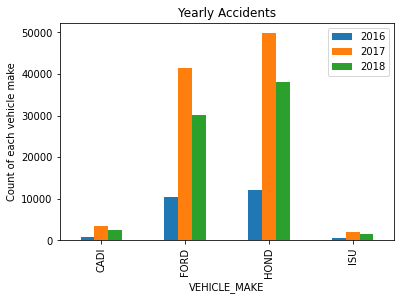

In [11]:
import numpy as np
import matplotlib.pyplot as plt
df2.T.plot(kind='bar')
plt.xlabel("VEHICLE_MAKE")
plt.ylabel("Count of each vehicle make")
plt.title("Yearly Accidents")
plt.legend()
plt.show()

In [12]:
path=("NYMVC3.csv")
df3=pd.read_csv(path)

In [13]:
df3=df3.groupby(['MONTH','VEHICLE_MAKE']).count()['UNIQUE_ID']

In [14]:
df3.unstack()

VEHICLE_MAKE,CAD,FOR,HON,ISU
MONTH,,,,
1,512,6359,7495,287
2,463,5691,6742,263
3,512,6989,8430,337
4,543,6383,7971,349
5,673,7589,9155,407
6,636,7585,9338,413
7,571,6924,8621,327
8,583,6798,8458,336
9,579,6778,8540,370


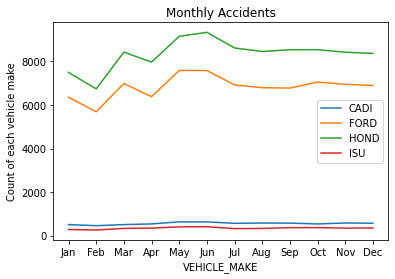

In [15]:
import numpy as np
import matplotlib.pyplot as plt
x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
accidents_count_cadi=[512,463,512,543,637,636,571,583,579,541,585,574]
accidents_count_ford=[6359,5691,6989,6383,7589,7585,6924,6798,6778,7053,6953,6896]
accidents_count_hond=[7495,6742,8430,7971,9155,9338,8621,8458,8540,8541,8425,8372]
accidents_count_isu=[287,263,337,349,407,413,327,336,370,372,350,356]
plt.plot(x,accidents_count_cadi, label='CADI')
plt.plot(x,accidents_count_ford, label='FORD')
plt.plot(x,accidents_count_hond, label='HOND')
plt.plot(x,accidents_count_isu, label='ISU')
plt.xlabel("VEHICLE_MAKE")
plt.ylabel("Count of each vehicle make")
plt.title("Monthly Accidents")
plt.legend()
plt.show()

In [16]:
path="/content/drive/MyDrive/NYMVC.csv"
df4=pd.read_csv(path)
df4=df[df['VEHICLE_TYPE'].str.contains(pat='Sedan|2 dr Sedan|4 dr Sedan|PASSENGER VEHICLE|SPORT UTILITY/STATION WAGON|Station Wagon/Sport Utility Vehicle|TAXI/Taxi|VAN|Bike|Bus|Pick-up Truck|Box truck|Motorcycle|Bicycle',regex=True)]
df4.groupby(['VEHICLE_TYPE']).count()['UNIQUE_ID']

VEHICLE_TYPE
Bike                                       52
Bus                                     12894
MINIVAN                                     1
Motorcycle                               3883
Pick-up Truck                           25987
School Bus                                111
Sedan                                  402704
Station Wagon/Sport Utility Vehicle    289567
VAN C                                       1
VAN F                                       1
VAN T                                      10
VAN U                                       1
VAN W                                       1
VAN/T                                       3
VANG                                        1
VAN\T                                       1
VAN`                                        1
Name: UNIQUE_ID, dtype: int64

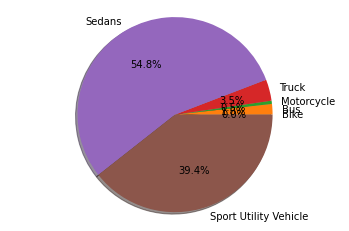

In [17]:
import matplotlib.pyplot as plt
data=[52,12894,3883,25987,402704,289567]
label=['Bike','Bus','Motorcycle','Truck','Sedans','Sport Utility Vehicle']
plt.pie(data, labels=label, autopct='%1.1f%%', explode=None, shadow=True, startangle=0)
plt.axis('equal')
plt.show()